In [23]:
import numpy as np 
import pandas as pd
import os
from PIL import Image
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop

ModuleNotFoundError: No module named 'tensorflow'

In [12]:
image_paths = {
    "train_cataract" : [],
    "train_normal" : [],
    "test_cataract" : [],
    "test_normal" : []
}
for dirname, _, filenames in os.walk('C:\Users\asus\Desktop/processed_images'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        if "train/cataract" in path:
            image_paths["train_cataract"].append(path)
        elif "train/normal" in path:
            image_paths["train_normal"].append(path)
        elif "test/cataract" in path:
            image_paths["test_cataract"].append(path)
        elif "test/normal" in path:
            image_paths["test_normal"].append(path)

Bu kod, belirli bir dizindeki görüntü dosyalarını klasörlere göre ayırarak image_paths adlı bir sözlüğe yerleştiriyor. os.walk fonksiyonu, belirtilen dizinin altındaki tüm alt klasörleri dolaşarak dosya adlarını ve klasör adlarını elde etmeyi sağlar.

Kod, 'Desktop/processed_images' dizini altında dolaşarak her dosyanın yolunu alır. Ardından dosya yolu, içinde belirli dizelerin geçip geçmediğini kontrol ederek, ilgili kategoriye göre (train_cataract, train_normal, test_cataract, test_normal) image_paths sözlüğüne ekleniyor.

Örneğin:

"train/cataract" içeren dosyalar, image_paths sözlüğündeki "train_cataract" anahtarına ekleniyor.
"train/normal" içeren dosyalar, image_paths sözlüğündeki "train_normal" anahtarına ekleniyor.
"test/cataract" içeren dosyalar, image_paths sözlüğündeki "test_cataract" anahtarına ekleniyor.
"test/normal" içeren dosyalar, image_paths sözlüğündeki "test_normal" anahtarına ekleniyor.
Bu işlem sonucunda, her kategoriye ait dosya yolları image_paths sözlüğünde ilgili anahtar altında saklanmış oluyor.

In [13]:
print("Eğitim Dosyası Altında Bulunan Normal Göz Verisi Adeti:", len(image_paths["train_normal"]))
print("Eğitim Dosyası Altında Bulunan Katarak Göz Verisi Adeti:", len(image_paths["train_cataract"]))
print("Test Dosyası Altında Bulunan Normal Göz Verisi Adeti:", len(image_paths["test_normal"]))
print("Test Dosyası Altında Bulunan Katarak Göz Verisi Adeti:", len(image_paths["test_cataract"]))


Eğitim Dosyası Altında Bulunan Normal Göz Verisi Adeti: 0
Eğitim Dosyası Altında Bulunan Katarak Göz Verisi Adeti: 0
Test Dosyası Altında Bulunan Normal Göz Verisi Adeti: 0
Test Dosyası Altında Bulunan Katarak Göz Verisi Adeti: 0



Bu kod parçası, image_paths adlı sözlük yapısının "train_normal" anahtarına sahip listenin uzunluğunu (len()) hesaplar.

Örneğin, image_paths["train_normal"] listenin içinde "train_normal" kategorisi altında kaç adet dosya yolunun bulunduğunu belirtir. len(image_paths["train_normal"]) ifadesi, bu kategoride bulunan dosya yolunun toplam sayısını döndürür. Eğer bu değeri çalıştırırsak, "train_normal" kategorisindeki dosya yollarının toplam sayısını elde ederiz.

In [14]:
sample_img = np.array(Image.open(image_paths["test_normal"][5]))
print(f"size of image : {np.shape(sample_img)}")
plt.imshow(sample_img)

IndexError: list index out of range

In [15]:
# Görseli al
sample_img = np.array(Image.open(image_paths["test_normal"][5]))

# Boyutlandırma
resized_img = np.array(Image.fromarray(sample_img).resize((94, 55)))

# Yeni boyut
print(f"Resized image shape: {np.shape(resized_img)}")

# Görseli göster
plt.imshow(resized_img)
plt.show()


IndexError: list index out of range

RGB (Red, Green, Blue) Formatı:

Eğer kanal sayısı 3 ise (örneğin, (100, 100, 3)), bu genellikle renkli bir görüntüyü ifade eder. Her bir piksel, kırmızı, yeşil ve mavi renk kanallarının bir kombinasyonu ile oluşturulur.

In [16]:
sample_img = np.array(Image.open(image_paths["test_cataract"][4]))
print(f"size of image : {np.shape(sample_img)}")
plt.imshow(sample_img)

IndexError: list index out of range

In [17]:
# Görseli al
sample_img = np.array(Image.open(image_paths["test_cataract"][4]))

# Boyutlandırma
resized_img = np.array(Image.fromarray(sample_img).resize((94, 55)))

# Yeni boyut
print(f"Resized image shape: {np.shape(resized_img)}")

# Görseli göster
plt.imshow(resized_img)
plt.show()


IndexError: list index out of range

In [18]:
training_dir = "Desktop/processed_images/train/"
image_size = (55, 94, 3)
target_size = (55, 94)

In [19]:
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = target_size,
    class_mode = 'binary'
)

NameError: name 'ImageDataGenerator' is not defined

In [20]:
# Veri yolu
training_dir = "Desktop/processed_images/train/"
target_size = (55, 94)

# ImageDataGenerator oluştur
train_datagen = ImageDataGenerator(rescale=1/255)

# Veri yükleyici oluştur
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=target_size,
    class_mode='binary'
)

# Bilgiyi ekrana yazdır
print("Train Generator Information:")
print(f"Number of samples: {train_generator.samples}")
print(f"Classes: {train_generator.class_indices}")
print(f"Batch size: {train_generator.batch_size}")
print(f"Image shape: {train_generator.image_shape}")


NameError: name 'ImageDataGenerator' is not defined

In [21]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu',input_shape=image_size),
    MaxPooling2D(2, 2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

NameError: name 'Sequential' is not defined

In [22]:
model.summary()

NameError: name 'model' is not defined

Model özeti, her bir katmanın türünü, çıktı şeklini ve parametre sayısını gösterir. Örneğin, burada bir evrişimli sinir ağı (CNN) modeli özetlenmiş.

İlk evrişimli katman (Conv2D) giriş görüntüsünü (55x94x3) işler ve 16 adet 3x3 filtre kullanır. Bu katmanın çıktı şekli (None, 53, 92, 16) ve toplam 448 parametresi vardır.
Ardından bir MaxPooling katmanı (MaxPooling2D) gelir. Bu katman, evrişimli katmanın çıktısını 2x2 boyutunda bir pencere ile işleyerek boyutunu (None, 26, 46, 16) şekline küçültür.
Bir sonraki evrişimli katman da benzer şekilde (None, 24, 44, 32) şeklinde bir çıktı verir ve 4640 parametreye sahiptir.
İkinci bir MaxPooling katmanı gelir ve çıktı boyutunu (None, 12, 22, 32) şekline küçültür.
Flatten katmanı, evrişimli ve havuzlama katmanlarının çıktılarını düzleştirir ve (None, 8448) şeklinde bir çıktı verir.
Yoğun (fully connected) katmanlar olan iki Dense katmanı gelir. 128 nöron içeren ilk yoğun katman (None, 128) şeklinde çıktı verirken, ikinci katman bir sınıflandırma çıktısı olan (None, 1) şeklinde bir çıktı üretir.
Toplamda, modelinizin 1,086,689 parametresi bulunuyor. Bu parametreler, ağı eğitmek için kullanılan öğrenilebilir ağırlıkları ve önyargıları içerir. Trainable params ifadesi, bu parametrelerin tümünün eğitilebilir olduğunu ve eğitim sürecinde güncellenebileceğini belirtir. Non-trainable params ise bu modelde eğitilemeyen (donmuş) parametreleri ifade eder. Bu durum, örneğin, önceden eğitilmiş ağırlıkların kullanıldığı transfer öğrenme gibi senaryolarda ortaya çıkabilir.

In [24]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer=RMSprop(lr=0.001),
    metrics=['accuracy']
)

NameError: name 'model' is not defined

In [25]:
history = model.fit_generator(
    train_generator,
    epochs=16
)

NameError: name 'model' is not defined

NameError: name 'history' is not defined

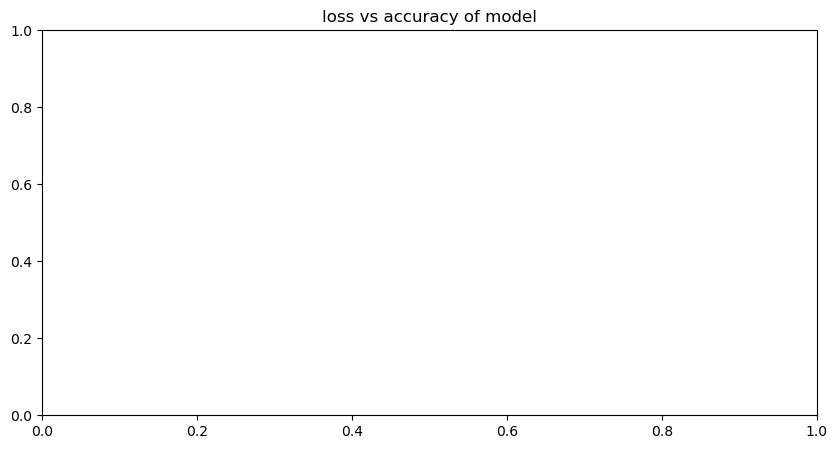

In [26]:
epochs = range(1, 17)
plt.figure(figsize=(10, 5))
plt.title("loss vs accuracy of model")
plt.plot(epochs, history.history['loss'], label='loss')
plt.plot(epochs, history.history['accuracy'], label='accuracy')
plt.grid()
plt.xlabel("epochs")
plt.grid()
plt.legend()

In [27]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [28]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

NameError: name 'tf' is not defined

In [29]:
from keras.preprocessing import image

ModuleNotFoundError: No module named 'keras'

In [30]:
label = train_generator.class_indices
print(label)

NameError: name 'train_generator' is not defined

In [31]:
path = image_paths["test_cataract"][0]
img = Image.open(path)
plt.imshow(np.array(img))
img = np.array(img.resize((94, 55)))
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
print("actual class : cataract")
print(f"predicted class : {'normal' if pred[0] > 0.5 else 'cataract'}")

IndexError: list index out of range

In [32]:
path = image_paths["test_normal"][1]
img = Image.open(path)
plt.imshow(np.array(img))
img = np.array(img.resize((94, 55)))
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
print("actual class : normal")
print(f"predicted class : {'normal' if pred[0] > 0.5 else 'cataract'}")

IndexError: list index out of range

In [33]:
def _predict(model, path):
    img = np.array(Image.open(path).resize((94, 55)))
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    if pred[0] > 0.5:
        return 'normal'
    else:
        return 'cataract'

In [34]:
def evaluate(model, normal_path, cataract_path):
    normal_pred = []
    cataract_pred = []
    for normal, cataract in zip(normal_path, cataract_path):
        res_cataract = _predict(model, cataract)
        cataract_pred.append(res_cataract)
        
        res_normal = _predict(model, normal)
        normal_pred.append(res_normal)
    
    return normal_pred, cataract_pred

In [35]:
both_size = min(len(image_paths["test_normal"]), len(image_paths["test_cataract"]))
cataract_test_path = image_paths["test_cataract"][:both_size]
normal_test_path = image_paths["test_normal"][:both_size]
normal_pred, cataract_pred = evaluate(model, image_paths["test_normal"], image_paths["test_cataract"])

NameError: name 'model' is not defined

In [36]:
pred_df = pd.DataFrame()
pred_df["relative_path"] = normal_test_path + cataract_test_path
pred_df["actual_class"] = ["normal"]*len(normal_test_path) + ["cataract"]*len(cataract_test_path)
pred_df["predicted_class"] = normal_pred + cataract_pred

NameError: name 'normal_pred' is not defined

In [37]:
pred_df.tail(5)

,relative_path,actual_class


In [38]:
pred_df.head(5)

,relative_path,actual_class


In [39]:
tp = tn = fp = fn = 0
for actual, predicted in zip(list(pred_df['actual_class']), list(pred_df['predicted_class'])):
    if actual == 'normal' and predicted == 'normal':
        tp = tp + 1
    elif actual == 'cataract' and predicted == 'cataract':
        tn = tn + 1
    elif actual == 'normal' and predicted == 'cataract':
        fp = fp + 1
    elif actual == 'cataract' and predicted == 'normal':
        fn = fn + 1

KeyError: 'predicted_class'

True Positive (TP): Gerçek değeri pozitif olan ve modelin de doğru bir şekilde pozitif olarak tahmin ettiği örnekler.

True Negative (TN): Gerçek değeri negatif olan ve modelin de doğru bir şekilde negatif olarak tahmin ettiği örnekler.

False Positive (FP): Gerçek değeri negatif olan ancak modelin pozitif olarak yanlış bir şekilde tahmin ettiği örnekler (Type I error).

False Negative (FN): Gerçek değeri pozitif olan ancak modelin negatif olarak yanlış bir şekilde tahmin ettiği örnekler (Type II error).

In [ ]:
print(tp)

In [ ]:
print(tn)

In [ ]:
print(fp)

In [ ]:
print(fn)

In [ ]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)

In [ ]:
evaluation_summary = pd.DataFrame()
evaluation_summary["accuracy"] = [accuracy]
evaluation_summary["precision"] = [precision]
evaluation_summary["recall"] = [recall]
evaluation_summary["f1"] = [f1]

In [ ]:
evaluation_summary

In [ ]:
# Grafik oluşturma
ax = evaluation_summary.plot(kind='bar', figsize=(8, 6))

# Barların üzerine değerleri ekleme
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.title('Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()


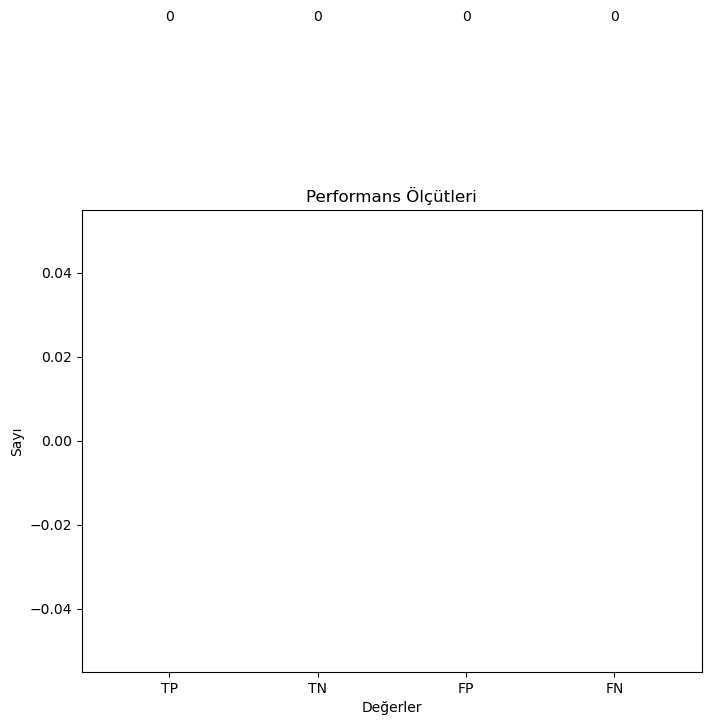

In [40]:
import matplotlib.pyplot as plt

# Değerlerin ve etiketlerin listesi
values = [tp, tn, fp, fn]
labels = ['TP', 'TN', 'FP', 'FN']

# Çubuk grafik oluşturma
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['green', 'blue', 'red', 'orange'])
plt.xlabel('Değerler')
plt.ylabel('Sayı')
plt.title('Performans Ölçütleri')

# Değerlerin çubukların üzerine yazılması
for i, value in enumerate(values):
    plt.text(i, value + 0.1, str(value), ha='center')

plt.show()


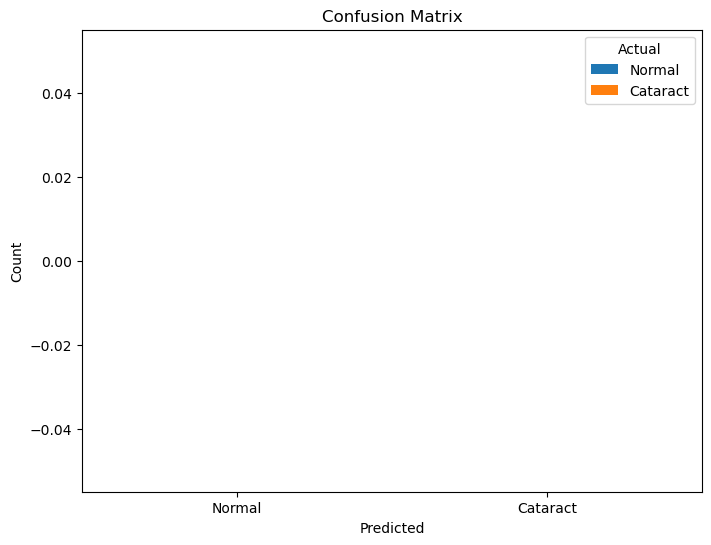

In [41]:
import pandas as pd

# Verilerinizi DataFrame olarak düzenleyelim
confusion_data = {
    'Predicted': ['Normal', 'Cataract'],
    'Normal': [tn, fn],
    'Cataract': [fp, tp]
}

# DataFrame oluşturma
confusion_df = pd.DataFrame(confusion_data)
confusion_df = confusion_df.set_index('Predicted')

# Görselleştirme (Çubuk grafik)
confusion_df.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Actual')
plt.show()


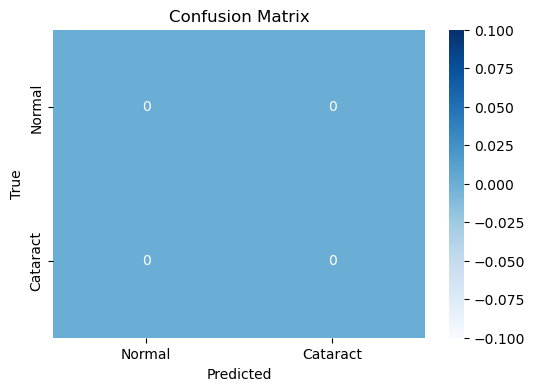

In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Veriler
conf_matrix = np.array([[tn, fp], [fn, tp]])

# Görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Cataract'], 
            yticklabels=['Normal', 'Cataract'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
